In [1]:
import sys
sys.path.append('..')
sys.path.append('../..')

from stats import *
from sentiment_stats import *

from peewee import SQL
from database.models import RawFacebookComments, RawTwitterComments, RawInstagramComments, RawYouTubeComments, RawHashtagComments

rede_social = 'Hashtags'
modelo = RawHashtagComments

cores = ['#FFA726', '#66BB6A', '#42A5F5', '#FFEE58', '#EF5350', '#AB47BC', '#C8C8C8']
cores2 = ['#FFA726', '#AB47BC', '#FFEE58', '#C8C8C8', '#EF5350', '#66BB6A', '#42A5F5']
cores_val = ['#EF5350', '#C8C8C8', '#66BB6A']
cores_val2 = ['#66BB6A', '#EF5350', '#C8C8C8']
sentimentos = ['ALEGRIA', 'SURPRESA', 'TRISTEZA', 'MEDO', 'RAIVA', 'DESGOSTO', 'NEUTRO']
valencia = ['POSITIVO', 'NEGATIVO', 'NEUTRO']

valencia_dict = OrderedDict()
for val in valencia:
    valencia_dict[val] = 0

sentimentos_dict = OrderedDict()
for sentimento in sentimentos:
    sentimentos_dict[sentimento] = 0
    
default_clause = [
    SQL('length(clean_comment) > 0'),
]

positivo_clause = [
    SQL('length(emotion) > 0 AND length(valence) > 0'),
    SQL('emotion in ("ALEGRIA", "SURPRESA") AND valence = "POSITIVO"')
]

negativo_clause = [
    SQL('length(emotion) > 0 AND length(valence) > 0'),
    SQL('emotion in ("TRISTEZA", "RAIVA", "MEDO", "DESGOSTO") AND valence = "NEGATIVO"')
]

neutro_clause = [
    SQL('length(emotion) > 0 AND length(valence) > 0'),
    SQL('emotion in ("NEUTRO") AND valence = "NEUTRO"')
]

general = default_clause + [
    SQL('length(emotion) > 0 AND length(valence) > 0'),
    SQL("""
        (emotion in ("ALEGRIA", "SURPRESA") AND valence = "POSITIVO") 
        OR 
        (emotion in ("TRISTEZA", "RAIVA", "MEDO", "DESGOSTO") AND valence = "NEGATIVO")
        OR
        (emotion in ("NEUTRO") AND valence = "NEUTRO")
    """)
]

### Emoções gerais dos comentários : Twitter Hashtags

In [2]:
total_comentarios = modelo.select() \
        .where(default_clause) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause)) \
        .order_by(modelo.timestamp)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause)) \
        .order_by(modelo.timestamp)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause)) \
        .order_by(modelo.timestamp)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general)) \
        .order_by(modelo.timestamp)

In [3]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Hashtags:
--------------------
Total de Comentários  : 282674
Comentários Positivos : 50532
Comentários Negativos : 62441
Comentários Neutros   : 5066

Porcentagem de comentários:
--------------------
Comentários Positivos : 17.88%
Comentários Negativos : 22.09%
Comentários Neutros   : 1.79%
Total                 : 41.76%


#### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,50532,62441,5066


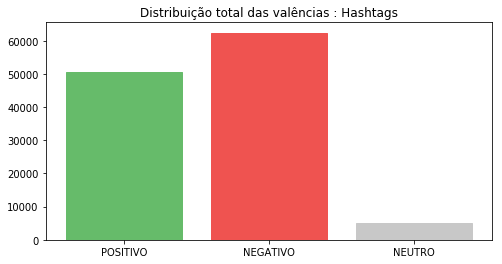

In [4]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

#### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,50062,470,55568,30,545,6298,5066


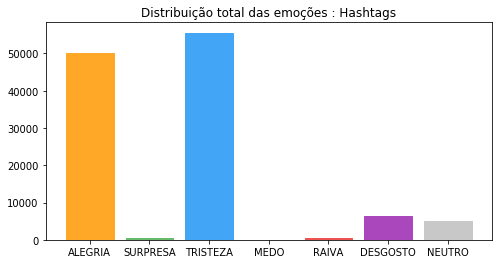

In [5]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

#### Comentários por data : Valência

,11/05/2011,07/10/2012,05/10/2014,06/10/2014,26/10/2014,25/09/2016,28/09/2016,29/09/2016
NEGATIVO,5,3,3,1,1,0,0,0
NEUTRO,0,0,0,0,0,0,0,0
POSITIVO,0,1,2,0,1,2,2,1


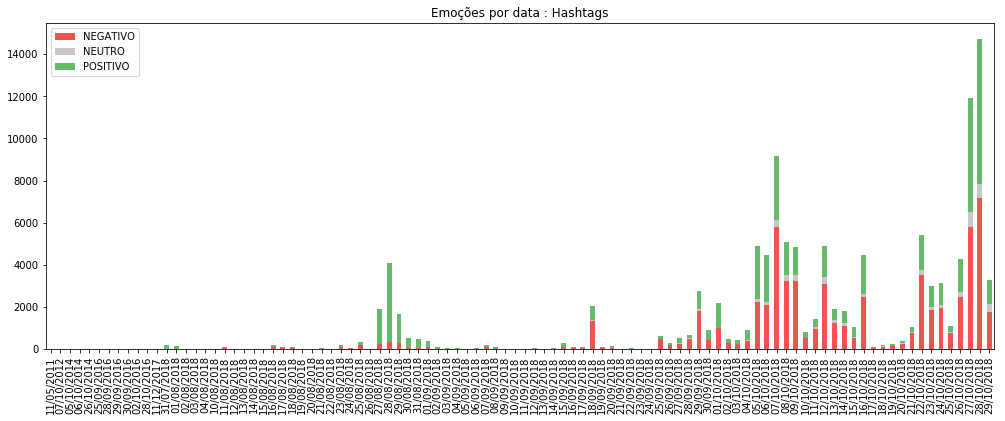

In [6]:
graph_valencia_por_data(rede_social, cores_val, valencia_dict, comentarios)

#### Comentários por data : Emoções

,11/05/2011,07/10/2012,05/10/2014,06/10/2014,26/10/2014,25/09/2016,28/09/2016,29/09/2016
ALEGRIA,0,1,2,0,1,2,2,1
DESGOSTO,0,1,0,0,0,0,0,0
MEDO,0,0,0,0,0,0,0,0
NEUTRO,0,0,0,0,0,0,0,0
RAIVA,0,0,0,0,0,0,0,0
SURPRESA,0,0,0,0,0,0,0,0
TRISTEZA,5,2,3,1,1,0,0,0


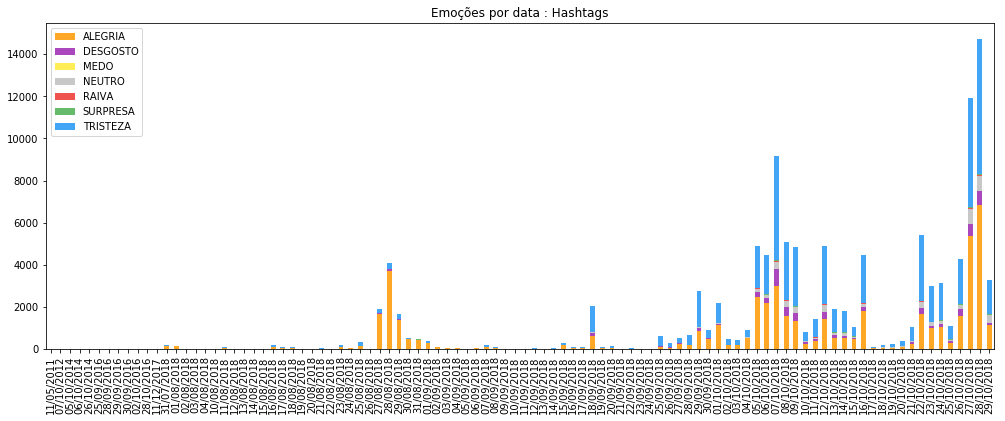

In [7]:
graph_emocoes_por_data(rede_social, cores2, sentimentos_dict, comentarios)

### Emoções por algumas hashtags : Twitter Hashtags

#### EleNão

In [8]:
hashtag_c = [modelo.hashtag == 'EleNão']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + hashtag_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + hashtag_c)) \
        .order_by(modelo.timestamp)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + hashtag_c)) \
        .order_by(modelo.timestamp)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + hashtag_c)) \
        .order_by(modelo.timestamp)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + hashtag_c)) \
        .order_by(modelo.timestamp)

In [9]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Hashtags:
--------------------
Total de Comentários  : 17372
Comentários Positivos : 1638
Comentários Negativos : 7305
Comentários Neutros   : 223

Porcentagem de comentários:
--------------------
Comentários Positivos : 9.43%
Comentários Negativos : 42.05%
Comentários Neutros   : 1.28%
Total                 : 52.76%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,1638,7305,223


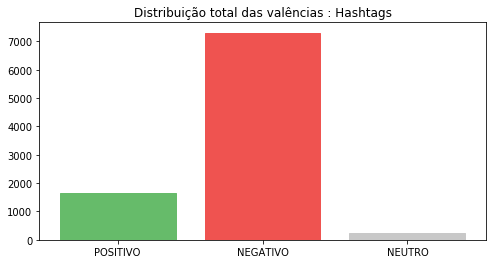

In [10]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,1601,37,6911,1,74,319,223


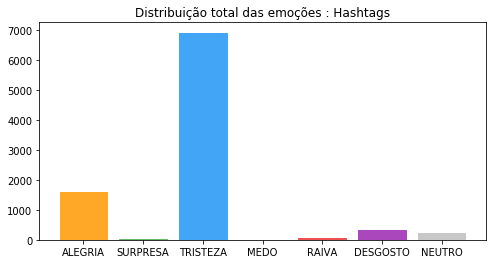

In [11]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

##### Comentários por data : Valência

,18/09/2018,19/09/2018,29/09/2018,05/10/2018,06/10/2018,07/10/2018,08/10/2018,09/10/2018
NEGATIVO,179,38,232,284,536,660,316,285
NEUTRO,8,2,2,9,8,14,6,9
POSITIVO,35,13,44,62,117,124,74,72


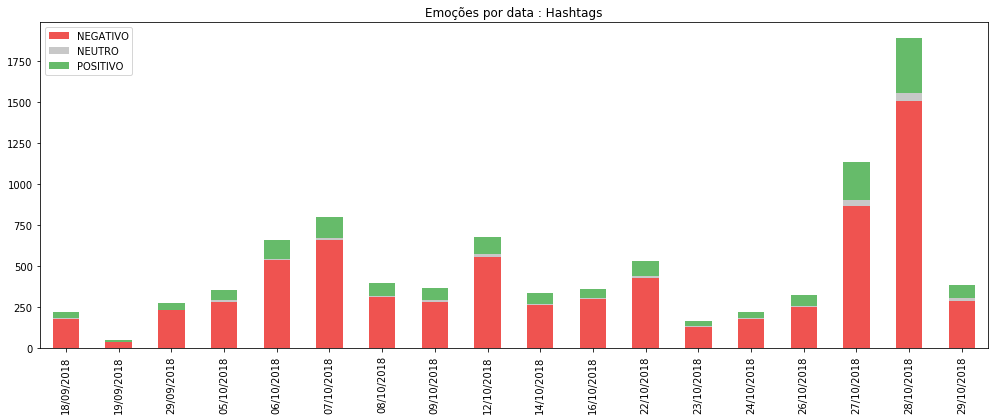

In [12]:
graph_valencia_por_data(rede_social, cores_val, valencia_dict, comentarios)

##### Comentários por data : Emoções

,18/09/2018,19/09/2018,29/09/2018,05/10/2018,06/10/2018,07/10/2018,08/10/2018,09/10/2018
ALEGRIA,32,13,43,62,113,124,72,69
DESGOSTO,13,0,12,13,19,29,15,25
MEDO,0,0,0,0,0,0,0,0
NEUTRO,8,2,2,9,8,14,6,9
RAIVA,0,0,0,5,11,2,2,5
SURPRESA,3,0,1,0,4,0,2,3
TRISTEZA,166,38,220,266,506,629,299,255


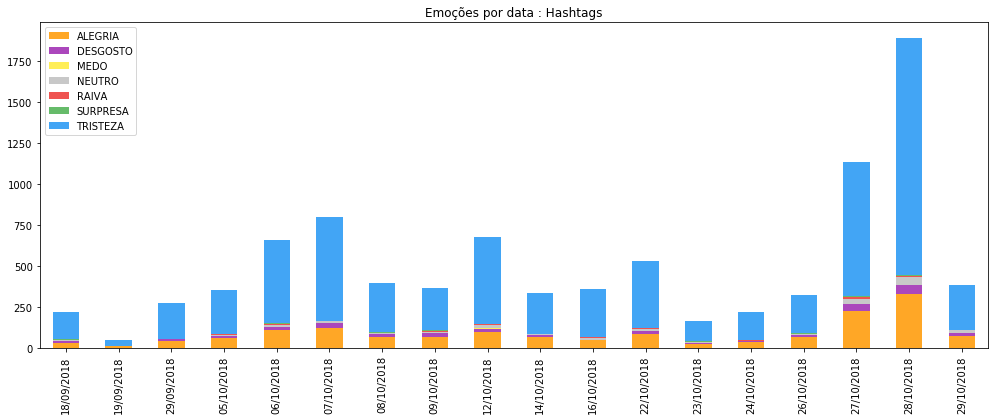

In [13]:
graph_emocoes_por_data(rede_social, cores2, sentimentos_dict, comentarios)

#### elesimeno1turno

In [14]:
hashtag_c = [modelo.hashtag == 'elesimeno1turno']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + hashtag_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + hashtag_c)) \
        .order_by(modelo.timestamp)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + hashtag_c)) \
        .order_by(modelo.timestamp)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + hashtag_c)) \
        .order_by(modelo.timestamp)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + hashtag_c)) \
        .order_by(modelo.timestamp)

In [15]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Hashtags:
--------------------
Total de Comentários  : 2184
Comentários Positivos : 316
Comentários Negativos : 356
Comentários Neutros   : 1

Porcentagem de comentários:
--------------------
Comentários Positivos : 14.47%
Comentários Negativos : 16.3%
Comentários Neutros   : 0.05%
Total                 : 30.82%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,316,356,1


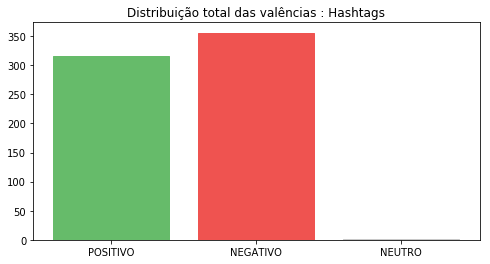

In [16]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,314,2,342,0,4,10,1


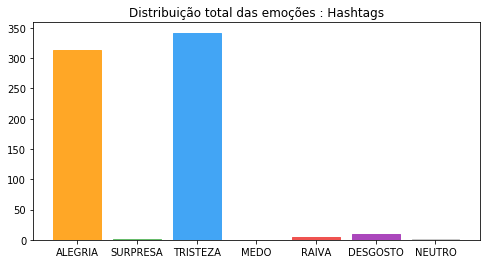

In [17]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

##### Comentários por data : Valência

,29/09/2018,05/10/2018,06/10/2018,07/10/2018,08/10/2018,09/10/2018,11/10/2018
NEGATIVO,97,105,69,79,2,3,1
NEUTRO,1,0,0,0,0,0,0
POSITIVO,58,98,73,75,6,6,0


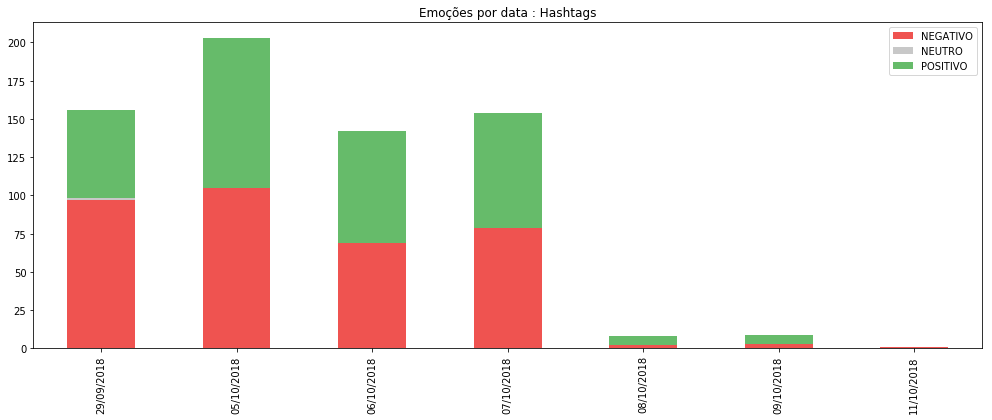

In [18]:
graph_valencia_por_data(rede_social, cores_val, valencia_dict, comentarios)

##### Comentários por data : Emoções

,29/09/2018,05/10/2018,06/10/2018,07/10/2018,08/10/2018,09/10/2018,11/10/2018
ALEGRIA,57,98,73,74,6,6,0
DESGOSTO,2,3,1,4,0,0,0
MEDO,0,0,0,0,0,0,0
NEUTRO,1,0,0,0,0,0,0
RAIVA,1,0,2,1,0,0,0
SURPRESA,1,0,0,1,0,0,0
TRISTEZA,94,102,66,74,2,3,1


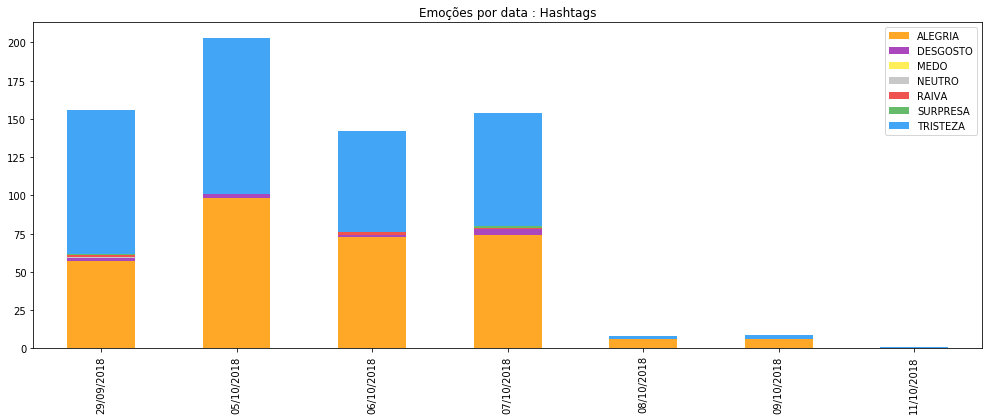

In [19]:
graph_emocoes_por_data(rede_social, cores2, sentimentos_dict, comentarios)

#### ViraViraCiro

In [20]:
hashtag_c = [modelo.hashtag == 'ViraViraCiro']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + hashtag_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + hashtag_c)) \
        .order_by(modelo.timestamp)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + hashtag_c)) \
        .order_by(modelo.timestamp)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + hashtag_c)) \
        .order_by(modelo.timestamp)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + hashtag_c)) \
        .order_by(modelo.timestamp)

In [21]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Hashtags:
--------------------
Total de Comentários  : 3473
Comentários Positivos : 608
Comentários Negativos : 361
Comentários Neutros   : 4

Porcentagem de comentários:
--------------------
Comentários Positivos : 17.51%
Comentários Negativos : 10.39%
Comentários Neutros   : 0.12%
Total                 : 28.02%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,608,361,4


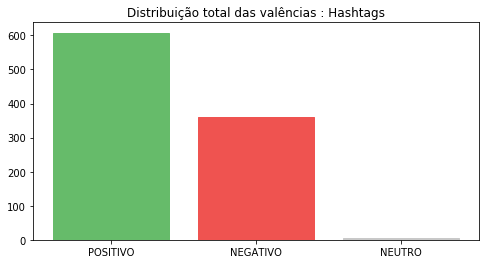

In [22]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,605,3,311,0,0,50,4


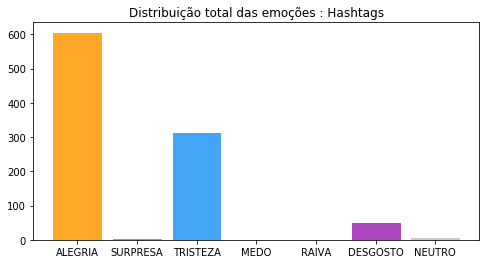

In [23]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

##### Comentários por data : Valência

,05/10/2018,06/10/2018,07/10/2018,08/10/2018,12/10/2018
NEGATIVO,49,101,188,23,0
NEUTRO,0,2,2,0,0
POSITIVO,129,237,221,19,2


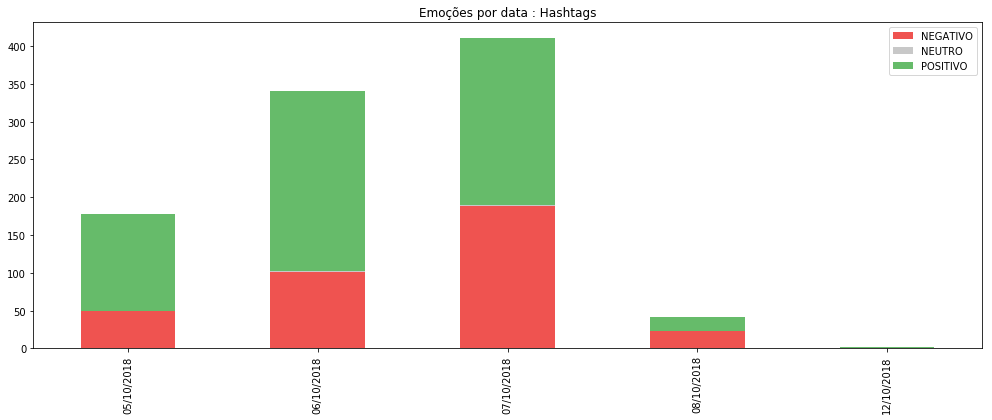

In [24]:
graph_valencia_por_data(rede_social, cores_val, valencia_dict, comentarios)

##### Comentários por data : Emoções

,05/10/2018,06/10/2018,07/10/2018,08/10/2018,12/10/2018
ALEGRIA,129,235,221,18,2
DESGOSTO,6,20,22,2,0
MEDO,0,0,0,0,0
NEUTRO,0,2,2,0,0
RAIVA,0,0,0,0,0
SURPRESA,0,2,0,1,0
TRISTEZA,43,81,166,21,0


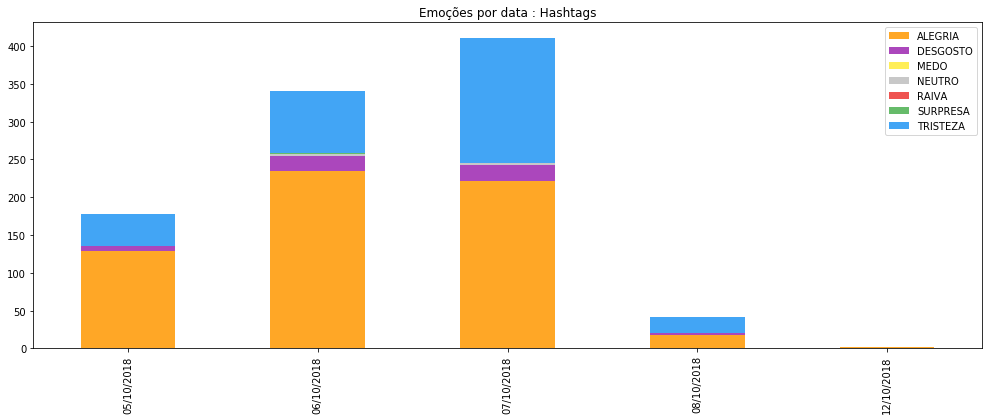

In [25]:
graph_emocoes_por_data(rede_social, cores2, sentimentos_dict, comentarios)

#### FicaTemer

In [26]:
hashtag_c = [modelo.hashtag == 'FicaTemer']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + hashtag_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + hashtag_c)) \
        .order_by(modelo.timestamp)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + hashtag_c)) \
        .order_by(modelo.timestamp)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + hashtag_c)) \
        .order_by(modelo.timestamp)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + hashtag_c)) \
        .order_by(modelo.timestamp)

In [27]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Hashtags:
--------------------
Total de Comentários  : 4947
Comentários Positivos : 419
Comentários Negativos : 3021
Comentários Neutros   : 9

Porcentagem de comentários:
--------------------
Comentários Positivos : 8.47%
Comentários Negativos : 61.07%
Comentários Neutros   : 0.18%
Total                 : 69.72%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,419,3021,9


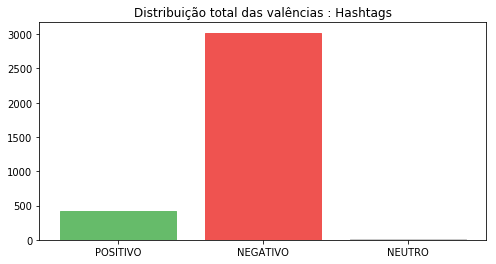

In [28]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,407,12,2988,0,1,32,9


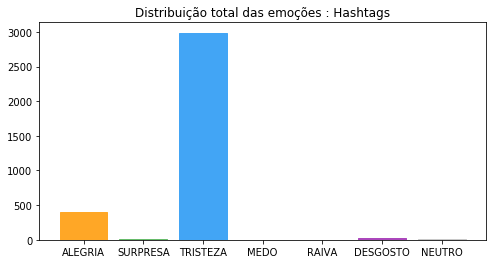

In [29]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

##### Comentários por data : Valência

,07/10/2018,08/10/2018,09/10/2018,11/10/2018,12/10/2018,13/10/2018,14/10/2018,15/10/2018
NEGATIVO,459,386,457,280,222,135,11,7
NEUTRO,1,1,3,0,0,0,0,0
POSITIVO,55,42,50,60,32,21,1,1


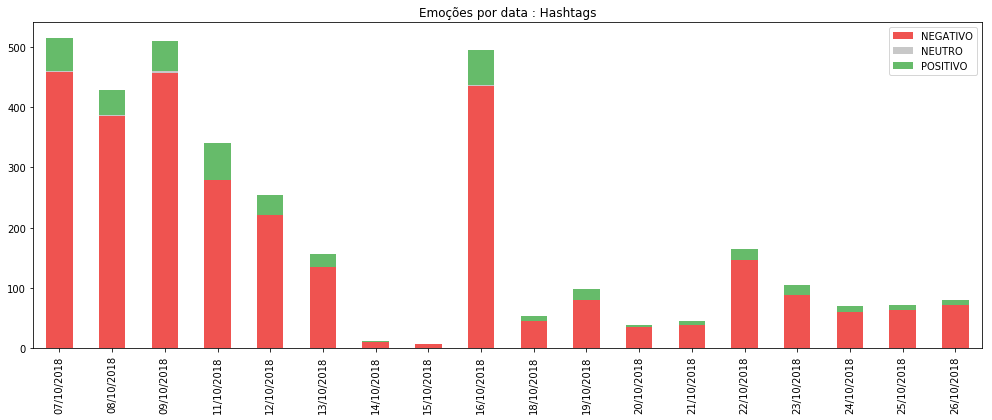

In [30]:
graph_valencia_por_data(rede_social, cores_val, valencia_dict, comentarios)

##### Comentários por data : Emoções

,07/10/2018,08/10/2018,09/10/2018,11/10/2018,12/10/2018,13/10/2018,14/10/2018,15/10/2018
ALEGRIA,55,40,49,56,32,20,1,1
DESGOSTO,2,6,5,3,2,1,0,0
MEDO,0,0,0,0,0,0,0,0
NEUTRO,1,1,3,0,0,0,0,0
RAIVA,0,0,0,1,0,0,0,0
SURPRESA,0,2,1,4,0,1,0,0
TRISTEZA,457,380,452,276,220,134,11,7


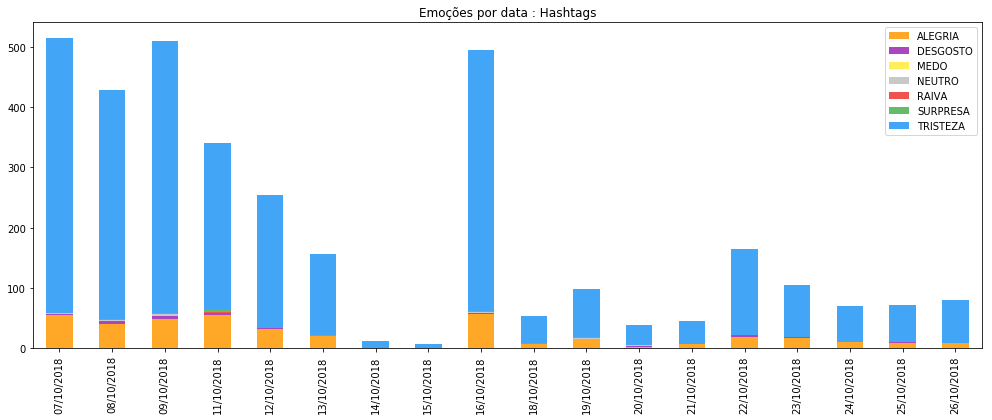

In [31]:
graph_emocoes_por_data(rede_social, cores2, sentimentos_dict, comentarios)

#### MarketeirosDoJair

In [32]:
hashtag_c = [modelo.hashtag == 'MarketeirosDoJair']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + hashtag_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + hashtag_c)) \
        .order_by(modelo.timestamp)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + hashtag_c)) \
        .order_by(modelo.timestamp)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + hashtag_c)) \
        .order_by(modelo.timestamp)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + hashtag_c)) \
        .order_by(modelo.timestamp)

In [33]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Hashtags:
--------------------
Total de Comentários  : 2883
Comentários Positivos : 434
Comentários Negativos : 564
Comentários Neutros   : 41

Porcentagem de comentários:
--------------------
Comentários Positivos : 15.05%
Comentários Negativos : 19.56%
Comentários Neutros   : 1.42%
Total                 : 36.04%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,434,564,41


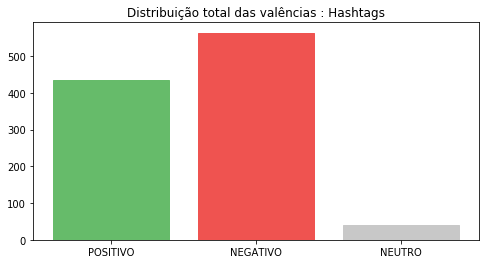

In [34]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,432,2,513,0,2,49,41


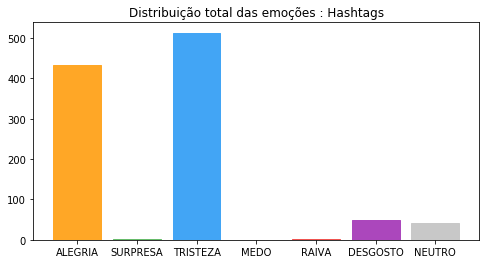

In [35]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

##### Comentários por data : Valência

,22/10/2018,23/10/2018,24/10/2018,26/10/2018,27/10/2018,28/10/2018,29/10/2018
NEGATIVO,170,93,79,69,116,35,2
NEUTRO,5,4,6,7,13,6,0
POSITIVO,112,35,54,54,102,70,7


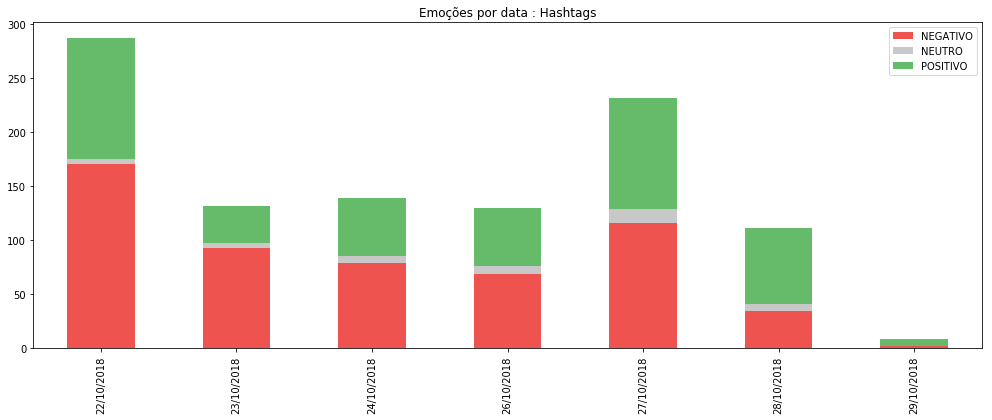

In [36]:
graph_valencia_por_data(rede_social, cores_val, valencia_dict, comentarios)

##### Comentários por data : Emoções

,22/10/2018,23/10/2018,24/10/2018,26/10/2018,27/10/2018,28/10/2018,29/10/2018
ALEGRIA,111,34,54,54,102,70,7
DESGOSTO,27,4,6,4,6,2,0
MEDO,0,0,0,0,0,0,0
NEUTRO,5,4,6,7,13,6,0
RAIVA,1,1,0,0,0,0,0
SURPRESA,1,1,0,0,0,0,0
TRISTEZA,142,88,73,65,110,33,2


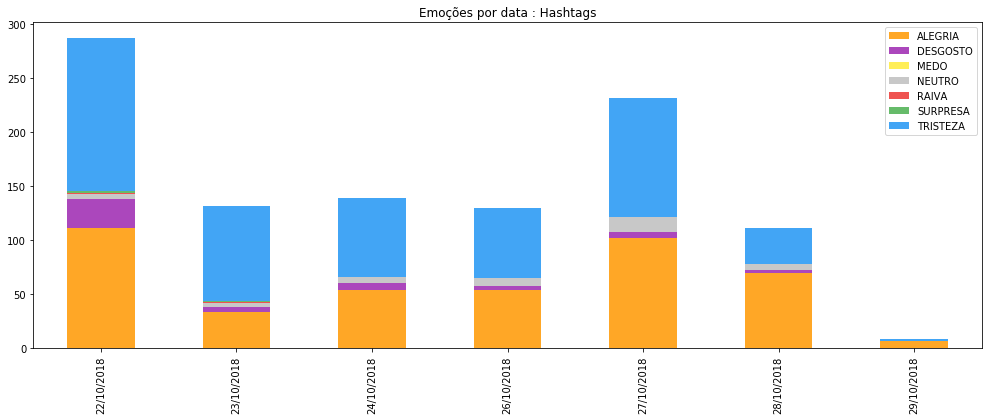

In [37]:
graph_emocoes_por_data(rede_social, cores2, sentimentos_dict, comentarios)

#### ViraVotoHaddad13

In [38]:
hashtag_c = [modelo.hashtag == 'ViraVotoHaddad13']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + hashtag_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + hashtag_c)) \
        .order_by(modelo.timestamp)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + hashtag_c)) \
        .order_by(modelo.timestamp)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + hashtag_c)) \
        .order_by(modelo.timestamp)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + hashtag_c)) \
        .order_by(modelo.timestamp)

In [39]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Hashtags:
--------------------
Total de Comentários  : 3859
Comentários Positivos : 573
Comentários Negativos : 378
Comentários Neutros   : 8

Porcentagem de comentários:
--------------------
Comentários Positivos : 14.85%
Comentários Negativos : 9.8%
Comentários Neutros   : 0.21%
Total                 : 24.85%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,573,378,8


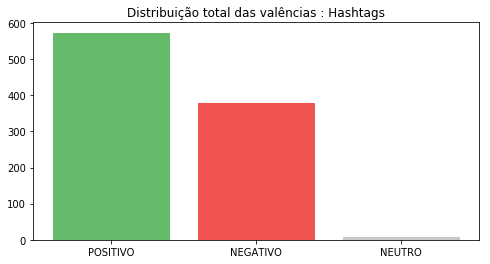

In [40]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,568,5,330,0,0,48,8


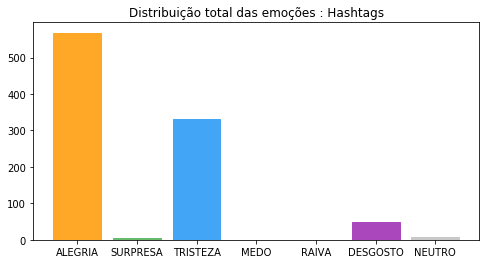

In [41]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

##### Comentários por data : Valência

,27/10/2018,28/10/2018
NEGATIVO,72,306
NEUTRO,1,7
POSITIVO,117,456


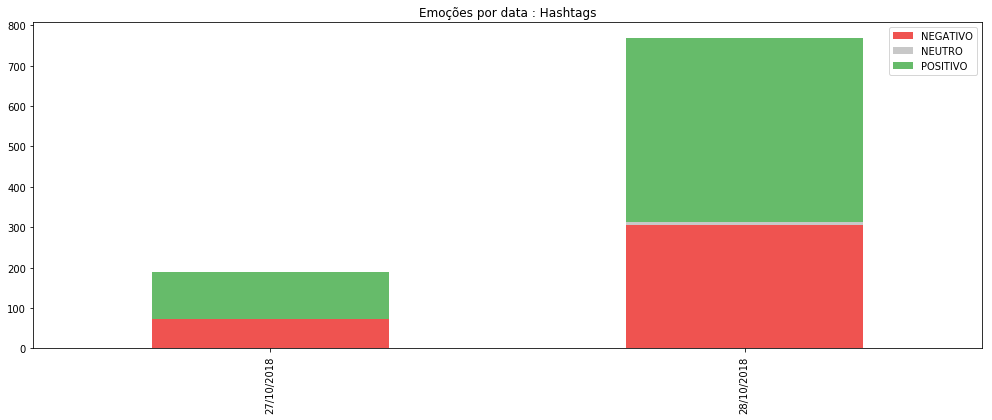

In [42]:
graph_valencia_por_data(rede_social, cores_val, valencia_dict, comentarios)

##### Comentários por data : Emoções

,27/10/2018,28/10/2018
ALEGRIA,117,451
DESGOSTO,7,41
MEDO,0,0
NEUTRO,1,7
RAIVA,0,0
SURPRESA,0,5
TRISTEZA,65,265


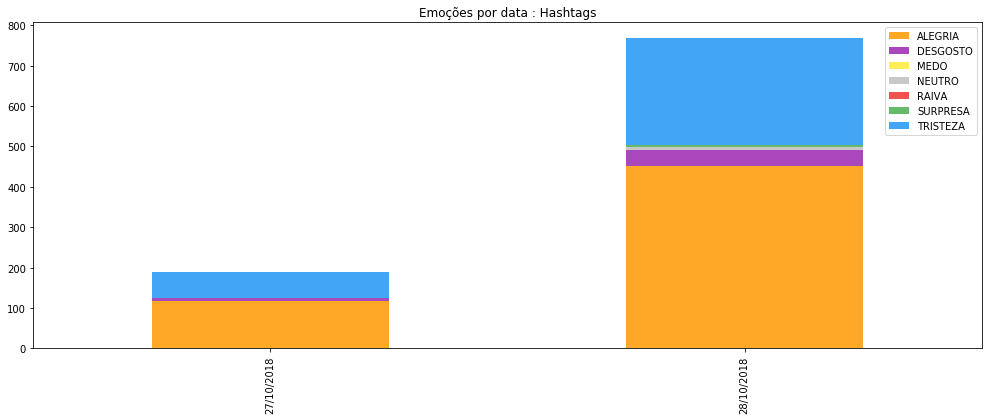

In [43]:
graph_emocoes_por_data(rede_social, cores2, sentimentos_dict, comentarios)